In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
book = pd.read_csv(r"C:\Users\Lenovo\Documents\Assignments\book.csv")

In [9]:
book.head()


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [7]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
ChildBks     2000 non-null int64
YouthBks     2000 non-null int64
CookBks      2000 non-null int64
DoItYBks     2000 non-null int64
RefBks       2000 non-null int64
ArtBks       2000 non-null int64
GeogBks      2000 non-null int64
ItalCook     2000 non-null int64
ItalAtlas    2000 non-null int64
ItalArt      2000 non-null int64
Florence     2000 non-null int64
dtypes: int64(11)
memory usage: 172.0 KB


In [10]:
book.shape

(2000, 11)

In [11]:
zero =[]
one = []
for i in book.columns:
    zero.append(list(book[i].value_counts())[0])
    one.append(list(book[i].value_counts())[1])

In [13]:
count_df = pd.DataFrame([zero,one], columns=book.copy().columns)
count_df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783
1,846,495,862,564,429,482,552,227,74,97,217


In [14]:
count_df.index = ['Not_Purchased', 'Purchased']
count_df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
Not_Purchased,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783
Purchased,846,495,862,564,429,482,552,227,74,97,217


In [15]:
print('maximum purchased item:',count_df.idxmax(axis = 1)[1],':',count_df.loc['Purchased'].max())
print('minimum purchased item:',count_df.idxmax(axis = 1)[0],':',count_df.loc['Not_Purchased'].max())

maximum purchased item: CookBks : 862
minimum purchased item: ItalAtlas : 1926


In [16]:
sorted_df = pd.DataFrame(count_df.sort_values(by=['Purchased'],axis=1,ascending=False).transpose())
sorted_df

,Not_Purchased,Purchased
CookBks,1138,862
ChildBks,1154,846
DoItYBks,1436,564
GeogBks,1448,552
YouthBks,1505,495
ArtBks,1518,482
RefBks,1571,429
ItalCook,1773,227
Florence,1783,217
ItalArt,1903,97


In [17]:
sorted_df['Purchased%']= sorted_df.Purchased/sum(sorted_df.Purchased)
sorted_df

,Not_Purchased,Purchased,Purchased%
CookBks,1138,862,0.177915
ChildBks,1154,846,0.174613
DoItYBks,1436,564,0.116409
GeogBks,1448,552,0.113932
YouthBks,1505,495,0.102167
ArtBks,1518,482,0.099484
RefBks,1571,429,0.088545
ItalCook,1773,227,0.046852
Florence,1783,217,0.044788
ItalArt,1903,97,0.020021


In [18]:
np.mean(sorted_df['Purchased%'])

0.0909090909090909

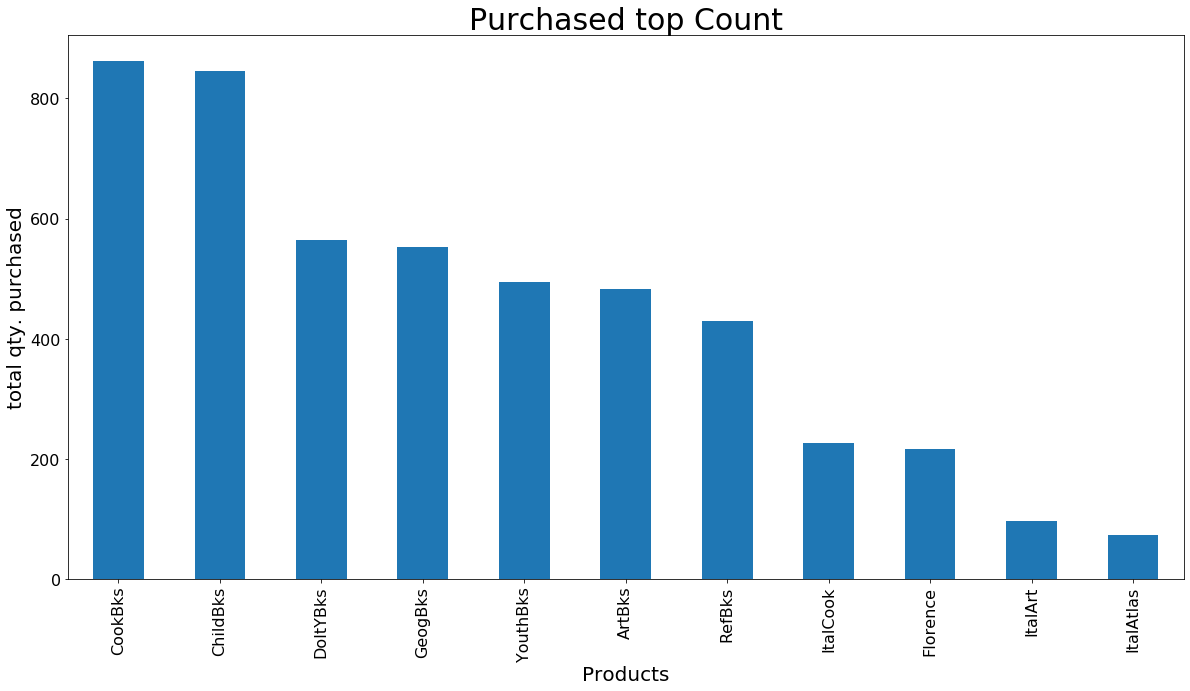

In [19]:
fig = plt.subplots(figsize=(20,10))
purchased = sorted_df.head(50).xs('Purchased' ,axis = 1)
purchased.plot(kind='bar',fontsize=16)
plt.title('Purchased top Count',fontsize=30)
plt.xlabel('Products', fontsize=20)
plt.ylabel('total qty. purchased', fontsize=20)
plt.show()

In [31]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(book, min_support=0.05, use_colnames=True, max_len=3)

In [30]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [28]:
freq_items.shape
freq_items.head(10)

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [29]:
freq_items.tail(10)

,support,itemsets
66,0.0585,"(ItalCook, DoItYBks, CookBks)"
67,0.0700,"(RefBks, ArtBks, CookBks)"
68,0.0890,"(RefBks, GeogBks, CookBks)"
69,0.1035,"(ArtBks, GeogBks, CookBks)"
70,0.0565,"(ArtBks, ItalCook, CookBks)"
71,0.0640,"(ItalCook, GeogBks, CookBks)"
72,0.0535,"(RefBks, DoItYBks, ArtBks)"
73,0.0585,"(RefBks, GeogBks, DoItYBks)"
74,0.0730,"(ArtBks, GeogBks, DoItYBks)"
75,0.0565,"(RefBks, GeogBks, ArtBks)"


In [32]:
confidence_association = association_rules(freq_items, metric='confidence', min_threshold=0.2)

In [33]:
confidence_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [34]:
lift_association = association_rules(freq_items, metric="lift", min_threshold=1)

In [35]:
lift_association.shape

(294, 9)

In [36]:
lift_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [37]:
redundancy = lift_association.sort_values(by=['leverage','confidence'],axis=0, ascending=False).reset_index()
redundancy = redundancy.drop(['index'], axis=1)
redundancy.shape
redundancy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982


In [38]:
unique_rules = redundancy.iloc[::1]
unique_rules.shape

(294, 9)

In [39]:
unique_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982
5,(DoItYBks),"(ChildBks, CookBks)",0.282,0.256,0.1460,0.517730,2.022385,0.073808,1.542706
6,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
7,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
8,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
9,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361


In [40]:
top_sort = unique_rules[unique_rules['lift']>1.5]

In [41]:
top_sort = top_sort.sort_values(by='lift', ascending=False)
top_sort.reset_index(inplace=True)
top_sort = top_sort.drop(['index'],axis=1)
top_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
1,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
2,(ItalCook),"(ArtBks, CookBks)",0.1135,0.1670,0.0565,0.497797,2.980822,0.037545,1.658693
3,"(ArtBks, CookBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
4,"(GeogBks, CookBks)",(ItalCook),0.1925,0.1135,0.0640,0.332468,2.929229,0.042151,1.328025


In [42]:
x = top_sort[['antecedents','consequents']]

In [43]:
item_list = []
for i in x.antecedents.to_list():
    for j in list(set(i)):
        item_list .append(j)

In [44]:
for p in x.consequents.to_list():
    for q in list(set(p)):
        item_list.append(q)

In [46]:
def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set))
    top_items =[]
    for m in unique_list:
        top_items.append(m)
    print(top_items)

In [47]:
unique(item_list)

['RefBks', 'DoItYBks', 'CookBks', 'YouthBks', 'ItalCook', 'ChildBks', 'ArtBks', 'GeogBks']
